- ID: 80744292
- semon@miners.utep.edu

In [1]:
using CSV, DataFrames, GLM, RegressionTables, Gadfly, Plots, RDatasets,  BoxCoxTrans, Statistics

In [71]:
# Enable printing of 1000 columns
ENV["COLUMNS"] = 1000

1000

In [2]:
Hitters = dataset("ISLR", "Hitters")

322×20 DataFrame
 Row │ AtBat  Hits   HmRun  Runs   RBI    Walks  Years  CAtBat  CHits  CHmRun  ⋯
     │ Int32  Int32  Int32  Int32  Int32  Int32  Int32  Int32   Int32  Int32   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   293     66      1     30     29     14      1     293     66       1  ⋯
   2 │   315     81      7     24     38     39     14    3449    835      69
   3 │   479    130     18     66     72     76      3    1624    457      63
   4 │   496    141     20     65     78     37     11    5628   1575     225
   5 │   321     87     10     39     42     30      2     396    101      12  ⋯
   6 │   594    169      4     74     51     35     11    4408   1133      19
   7 │   185     37      1     23      8     21      2     214     42       1
   8 │   298     73      0     24     24      7      3     509    108       0
   9 │   323     81      6     26     32      8      2     341     86       6  ⋯
  10 │   401     92     17     49     66     65     13    5206   1332     253
  11 │   574    159     21    107     75     59     10    4631   1300      90
  ⋮  │   ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮       ⋮      ⋮     ⋱
 313 │   387    124      1     67     27     36      7    1775    506       6
 314 │   580    207      8    107     71    105      5    2778    978      32  ⋯
 315 │   408    117     11     66     41     34      1     408    117      11
 316 │   593    172     22     82    100     57      1     593    172      22
 317 │   221     53      2     21     23     22      8    1063    283      15
 318 │   497    127      7     65     48     37      5    2703    806      32  ⋯
 319 │   492    136      5     76     50     94     12    5511   1511      39
 320 │   475    126      3     61     43     52      6    1700    433       7
 321 │   573    144      9     85     60     78      8    3198    857      97
 322 │   631    170      9     77     44     31     11    4908   1457      30  ⋯
                                                 10 columns and 301 rows omitted

In [3]:
println(size(Hitters))

(322, 20)


In [4]:
names(Hitters)

20-element Vector{String}:
 "AtBat"
 "Hits"
 "HmRun"
 "Runs"
 "RBI"
 "Walks"
 "Years"
 "CAtBat"
 "CHits"
 "CHmRun"
 "CRuns"
 "CRBI"
 "CWalks"
 "League"
 "Division"
 "PutOuts"
 "Assists"
 "Errors"
 "Salary"
 "NewLeague"

In [5]:
describe(Hitters)

20×7 DataFrame
 Row │ variable   mean     min   median  max     nmissing  eltype              ⋯
     │ Symbol     Union…   Any   Union…  Any     Int64     Type                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ AtBat      380.929  16    379.5   687            0  Int32               ⋯
   2 │ Hits       101.025  1     96.0    238            0  Int32
   3 │ HmRun      10.7702  0     8.0     40             0  Int32
   4 │ Runs       50.9099  0     48.0    130            0  Int32
   5 │ RBI        48.028   0     44.0    121            0  Int32               ⋯
   6 │ Walks      38.7422  0     35.0    105            0  Int32
   7 │ Years      7.4441   1     6.0     24             0  Int32
   8 │ CAtBat     2648.68  19    1928.0  14053          0  Int32
   9 │ CHits      717.571  4     508.0   4256           0  Int32               ⋯
  10 │ CHmRun     69.4907  0     37.5    548            0  Int32
  11 │ CRuns      358.795  1     247.0   2165           0  Int32
  12 │ CRBI       330.118  0     220.5   1659           0  Int32
  13 │ CWalks     260.239  0     170.5   1566           0  Int32               ⋯
  14 │ League              A             N              0  CategoricalValue{St
  15 │ Division            E             W              0  CategoricalValue{St
  16 │ PutOuts    288.938  0     212.0   1378           0  Int32
  17 │ Assists    106.913  0     39.5    492            0  Int32               ⋯
  18 │ Errors     8.04037  0     6.0     32             0  Int32
  19 │ Salary     535.926  67.5  425.0   2460.0        59  Union{Missing, Floa
  20 │ NewLeague           A             N              0  CategoricalValue{St
                                                                1 column omitted

## (a) Identify the Variables

In [6]:
dropmissing!(Hitters, :"Salary");
describe(Hitters)

20×7 DataFrame
 Row │ variable   mean     min   median  max     nmissing  eltype              ⋯
     │ Symbol     Union…   Any   Union…  Any     Int64     DataType            ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ AtBat      403.643  19    413.0   687            0  Int32               ⋯
   2 │ Hits       107.829  1     103.0   238            0  Int32
   3 │ HmRun      11.6198  0     9.0     40             0  Int32
   4 │ Runs       54.7452  0     52.0    130            0  Int32
   5 │ RBI        51.4867  0     47.0    121            0  Int32               ⋯
   6 │ Walks      41.1141  0     37.0    105            0  Int32
   7 │ Years      7.31179  1     6.0     24             0  Int32
   8 │ CAtBat     2657.54  19    1931.0  14053          0  Int32
   9 │ CHits      722.186  4     516.0   4256           0  Int32               ⋯
  10 │ CHmRun     69.2395  0     40.0    548            0  Int32
  11 │ CRuns      361.221  2     250.0   2165           0  Int32
  12 │ CRBI       330.418  3     230.0   1659           0  Int32
  13 │ CWalks     260.266  1     174.0   1566           0  Int32               ⋯
  14 │ League              A             N              0  CategoricalValue{St
  15 │ Division            E             W              0  CategoricalValue{St
  16 │ PutOuts    290.711  0     224.0   1377           0  Int32
  17 │ Assists    118.76   0     45.0    492            0  Int32               ⋯
  18 │ Errors     8.59316  0     7.0     32             0  Int32
  19 │ Salary     535.926  67.5  425.0   2460.0         0  Float64
  20 │ NewLeague           A             N              0  CategoricalValue{St
                                                                1 column omitted

In [7]:
using RCall
@rput Hitters
R"str(Hitters)"

'data.frame':	263 obs. of  20 variables:
 $ AtBat    : int  315 479 496 321 594 185 298 323 401 574 ...
 $ Hits     : int  81 130 141 87 169 37 73 81 92 159 ...
 $ HmRun    : int  7 18 20 10 4 1 0 6 17 21 ...
 $ Runs     : int  24 66 65 39 74 23 24 26 49 107 ...
 $ RBI      : int  38 72 78 42 51 8 24 32 66 75 ...
 $ Walks    : int  39 76 37 30 35 21 7 8 65 59 ...
 $ Years    : int  14 3 11 2 11 2 3 2 13 10 ...
 $ CAtBat   : int  3449 1624 5628 396 4408 214 509 341 5206 4631 ...
 $ CHits    : int  835 457 1575 101 1133 42 108 86 1332 1300 ...
 $ CHmRun   : int  69 63 225 12 19 1 0 6 253 90 ...
 $ CRuns    : int  321 224 828 48 501 30 41 32 784 702 ...
 $ CRBI     : int  414 266 838 46 336 9 37 34 890 504 ...
 $ CWalks   : int  375 263 354 33 194 24 12 8 866 488 ...
 $ League   : Factor w/ 2 levels "A","N": 2 1 2 2 1 2 1 2 1 1 ...
 $ Division : Factor w/ 2 levels "E","W": 2 2 1 1 2 1 2 2 1 1 ...
 $ PutOuts  : int  632 880 200 805 282 76 121 143 0 238 ...
 $ Assists  : int  43 82 11 40 42

RObject{NilSxp}
NULL


In [8]:
println("AtBat ---> ", typeof(Hitters.AtBat))
println("Hits ---> ", typeof(Hitters.Hits))
println("HmRuns ---> ", typeof(Hitters.HmRun))
println("Runs ---> ", typeof(Hitters.Runs))
println("RBI ---> ", typeof(Hitters.RBI))
println("Walks ---> ", typeof(Hitters.Walks))
println("Years ---> ", typeof(Hitters.Years))
println("CAtBat ---> ", typeof(Hitters.CAtBat))
println("CHits ---> ", typeof(Hitters.CHits))
println("CHmRun ---> ", typeof(Hitters.CHmRun))
println("CRuns ---> ", typeof(Hitters.CRuns))
println("CRBI ---> ", typeof(Hitters.CRBI))
println("CWalks ---> ", typeof(Hitters.CWalks))
println("League ---> ", typeof(Hitters.League))
println("Division ---> ", typeof(Hitters.Division))
println("PutOuts ---> ", typeof(Hitters.PutOuts))
println("Assists ---> ", typeof(Hitters.Assists))
println("Errors ---> ", typeof(Hitters.Errors))
println("Salary ---> ", typeof(Hitters.Salary))
println("NewLeague ---> ", typeof(Hitters.NewLeague))

AtBat ---> Vector{Int32}
Hits ---> Vector{Int32}
HmRuns ---> Vector{Int32}
Runs ---> Vector{Int32}
RBI ---> Vector{Int32}
Walks ---> Vector{Int32}
Years ---> Vector{Int32}
CAtBat ---> Vector{Int32}
CHits ---> Vector{Int32}
CHmRun ---> Vector{Int32}
CRuns ---> Vector{Int32}
CRBI ---> Vector{Int32}
CWalks ---> Vector{Int32}
League ---> CategoricalArrays.CategoricalVector{String, UInt8, String, CategoricalArrays.CategoricalValue{String, UInt8}, Union{}}
Division ---> CategoricalArrays.CategoricalVector{String, UInt8, String, CategoricalArrays.CategoricalValue{String, UInt8}, Union{}}
PutOuts ---> Vector{Int32}
Assists ---> Vector{Int32}
Errors ---> Vector{Int32}
Salary ---> Vector{Float64}
NewLeague ---> CategoricalArrays.CategoricalVector{String, UInt8, String, CategoricalArrays.CategoricalValue{String, UInt8}, Union{}}


## (b) Variables Association & Multiple Linear Model

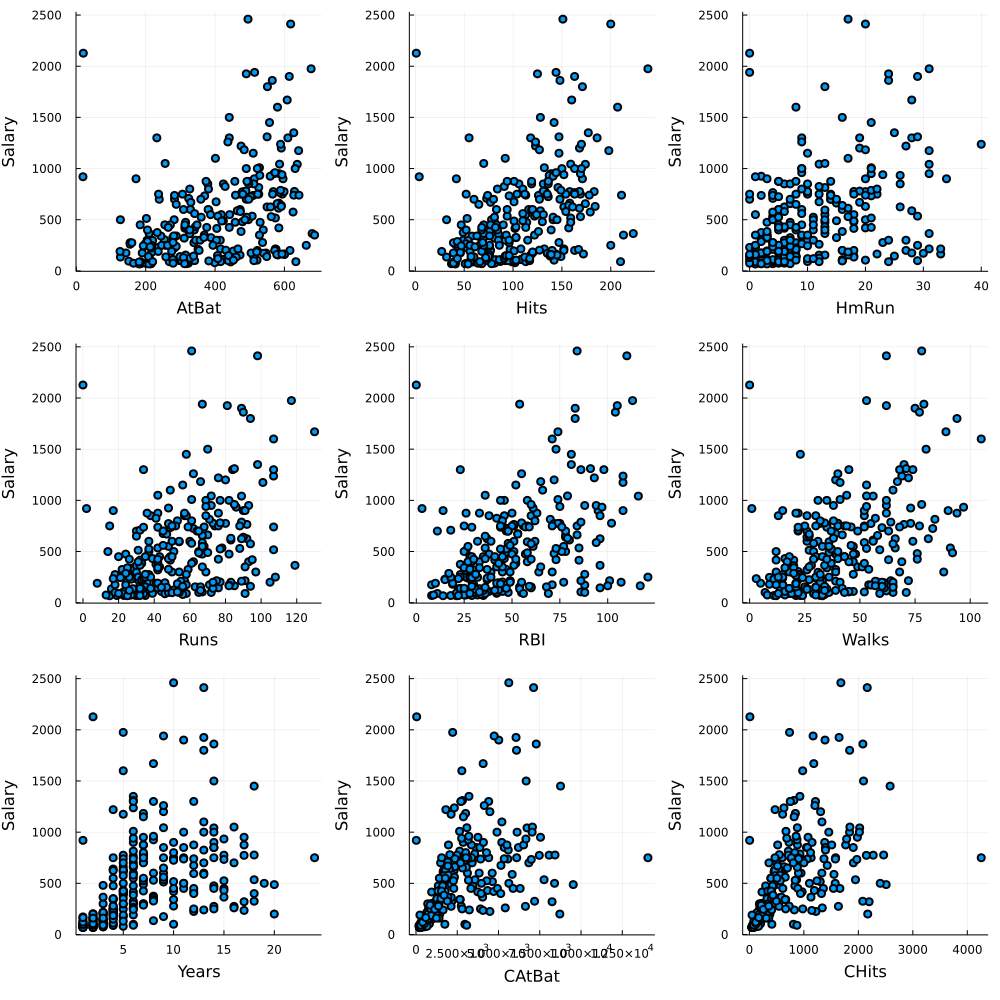

In [9]:
p1 = scatter(Hitters[!,:AtBat], Hitters[!,:Salary], xlabel="AtBat", ylabel="Salary");
p2 = scatter(Hitters[!,:Hits], Hitters[!,:Salary], xlabel="Hits", ylabel="Salary");
p3 = scatter(Hitters[!,:HmRun], Hitters[!,:Salary],  xlabel="HmRun", ylabel="Salary");
p4 = scatter(Hitters[!,:Runs], Hitters[!,:Salary],  xlabel="Runs", ylabel="Salary");
p5 = scatter(Hitters[!,:RBI], Hitters[!,:Salary], xlabel="RBI", ylabel="Salary");
p6 = scatter(Hitters[!,:Walks], Hitters[!,:Salary], xlabel="Walks", ylabel="Salary");
p7 = scatter(Hitters[!,:Years], Hitters[!,:Salary],  xlabel="Years", ylabel="Salary");
p8 = scatter(Hitters[!,:CAtBat], Hitters[!,:Salary],  xlabel="CAtBat", ylabel="Salary");
p9 = scatter(Hitters[!,:CHits], Hitters[!,:Salary],  xlabel="CHits", ylabel="Salary");

Plots.plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, layout = (3, 3), legend = false)
plot!(size=(1000, 1000))

In [10]:
println("Salary Vs AtBat::: ", Statistics.cor(Hitters.AtBat, Hitters.Salary))
println("Salary Vs Hits::: ", Statistics.cor(Hitters.Hits, Hitters.Salary))
println("Salary Vs HmRun::: ", Statistics.cor(Hitters.HmRun, Hitters.Salary))
println("Salary Vs Runs::: ", Statistics.cor(Hitters.Runs, Hitters.Salary))
println("Salary Vs RBI::: ", Statistics.cor(Hitters.RBI, Hitters.Salary))
println("Salary Vs Walks::: ", Statistics.cor(Hitters.Walks, Hitters.Salary))
println("Salary Vs Years::: ", Statistics.cor(Hitters.Years, Hitters.Salary))
println("Salary Vs CAtBat::: ", Statistics.cor(Hitters.CAtBat, Hitters.Salary))
println("Salary Vs CHits::: ", Statistics.cor(Hitters.CHits, Hitters.Salary))

Salary Vs AtBat::: 0.3947709447597372
Salary Vs Hits::: 0.43867473786941086
Salary Vs HmRun::: 0.3430280781546636
Salary Vs Runs::: 0.41985855930198174
Salary Vs RBI::: 0.449457087940034
Salary Vs Walks::: 0.4438672601629796
Salary Vs Years::: 0.40065699438268604
Salary Vs CAtBat::: 0.5261353096237888
Salary Vs CHits::: 0.5489095590351706


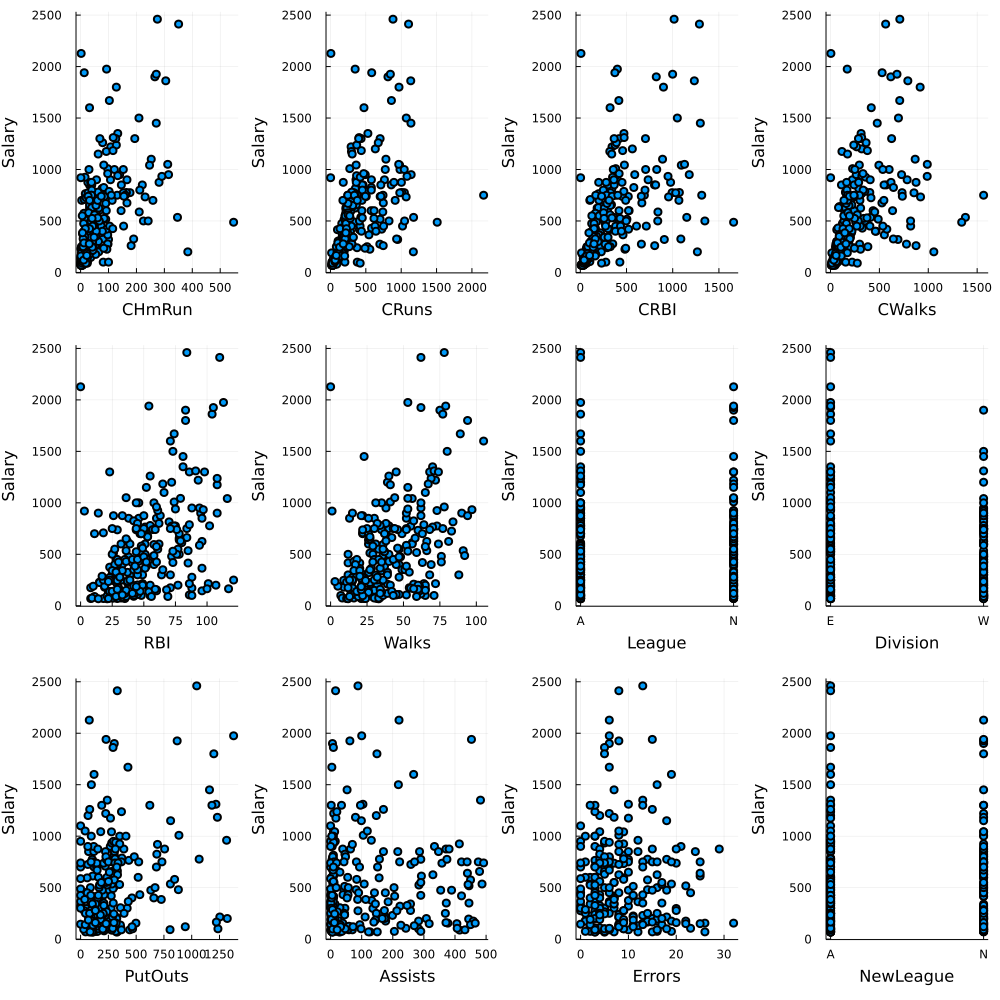

In [11]:
p10 = scatter(Hitters[!,:CHmRun], Hitters[!,:Salary], xlabel="CHmRun", ylabel="Salary");
p11 = scatter(Hitters[!,:CRuns], Hitters[!,:Salary], xlabel="CRuns", ylabel="Salary");
p12 = scatter(Hitters[!,:CRBI], Hitters[!,:Salary],  xlabel="CRBI", ylabel="Salary");
p13 = scatter(Hitters[!,:CWalks], Hitters[!,:Salary],  xlabel="CWalks", ylabel="Salary");
p14 = scatter(Hitters[!,:RBI], Hitters[!,:Salary], xlabel="RBI", ylabel="Salary");
p15 = scatter(Hitters[!,:Walks], Hitters[!,:Salary], xlabel="Walks", ylabel="Salary");
p16 = scatter(Hitters[!,:League], Hitters[!,:Salary],  xlabel="League", ylabel="Salary");
p17 = scatter(Hitters[!,:Division], Hitters[!,:Salary],  xlabel="Division", ylabel="Salary");
p18 = scatter(Hitters[!,:PutOuts], Hitters[!,:Salary],  xlabel="PutOuts", ylabel="Salary");
p19 = scatter(Hitters[!,:Assists], Hitters[!,:Salary],  xlabel="Assists", ylabel="Salary");
p20 = scatter(Hitters[!,:Errors], Hitters[!,:Salary],  xlabel="Errors", ylabel="Salary");
p21 = scatter(Hitters[!,:NewLeague], Hitters[!,:Salary],  xlabel="NewLeague", ylabel="Salary");

Plots.plot(p10, p11, p12, p13, p14, p15, p16, p17, p18, p19, p20, p21, layout = (3, 4), legend = false)
plot!(size=(1000, 1000))

In [12]:
println("Salary Vs CHmRun::: ", Statistics.cor(Hitters.CHmRun, Hitters.Salary))
println("Salary Vs CRuns::: ", Statistics.cor(Hitters.CRuns, Hitters.Salary))
println("Salary Vs CRBI::: ", Statistics.cor(Hitters.CRBI, Hitters.Salary))
println("Salary Vs CWalks::: ", Statistics.cor(Hitters.CWalks, Hitters.Salary))
println("Salary Vs PutOuts::: ", Statistics.cor(Hitters.PutOuts, Hitters.Salary))
println("Salary Vs Assists::: ", Statistics.cor(Hitters.Assists, Hitters.Salary))
println("Salary Vs Errors::: ", Statistics.cor(Hitters.Errors, Hitters.Salary))

Salary Vs CHmRun::: 0.5249305595435936
Salary Vs CRuns::: 0.5626777110048051
Salary Vs CRBI::: 0.5669656856176525
Salary Vs CWalks::: 0.48982203628068005
Salary Vs PutOuts::: 0.3004803555060053
Salary Vs Assists::: 0.025436135647346664
Salary Vs Errors::: -0.005400701500953189


### The varibales have some moderate linear association with the dependent varibale. The varibale "PutOuts", "Assists", "Erros" have relatively weaker linear association than others. The Plots and Correlation values both represent those interpretation.

### Multiple Regression Model

In [15]:
m1 = @formula(Salary~AtBat+Hits+HmRun+Runs+RBI+Walks+Years+CAtBat+CHits+CHmRun+CRuns+CRBI+CWalks+League+Division+PutOuts+Assists+Errors+NewLeague)

FormulaTerm
Response:
  Salary(unknown)
Predictors:
  AtBat(unknown)
  Hits(unknown)
  HmRun(unknown)
  Runs(unknown)
  RBI(unknown)
  Walks(unknown)
  Years(unknown)
  CAtBat(unknown)
  CHits(unknown)
  CHmRun(unknown)
  CRuns(unknown)
  CRBI(unknown)
  CWalks(unknown)
  League(unknown)
  Division(unknown)
  PutOuts(unknown)
  Assists(unknown)
  Errors(unknown)
  NewLeague(unknown)

In [16]:
model1 = lm(m1, Hitters)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Salary ~ 1 + AtBat + Hits + HmRun + Runs + RBI + Walks + Years + CAtBat + CHits + CHmRun + CRuns + CRBI + CWalks + League + Division + PutOuts + Assists + Errors + NewLeague

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)    163.104     90.7785      1.80    0.0736   -15.7096     341.917
AtBat           -1.97987    0.633978   -3.12    0.0020    -3.22867     -0.731079
Hits             7.50077    2.37753     3.15    0.0018     2.81756     12.184
HmRun            4.33088    6.20145     0.70    0.4856    -7.88457     16.5463
Runs            -2.37621    2.98076    -0.80    0.4261    -8.24763     

### R-square value

In [17]:
# R Square value of the model
r2(model1)

0.5461158619125323

### Coefficient Significance


In [18]:
coef(model1)

20-element Vector{Float64}:
  163.10358775117987
   -1.9798728999519999
    7.500767544664079
    4.330882897911241
   -2.376209983954669
   -1.0449619609758753
    6.231286323075035
   -3.489054263241972
   -0.17134047309998213
    0.133990961432787
   -0.17286107024687594
    1.4543049400843155
    0.807708801703598
   -0.811570910626846
   62.59942303518597
 -116.84924563687468
    0.281892513358237
    0.37106921041623425
   -3.360760479856258
  -24.762325108398404

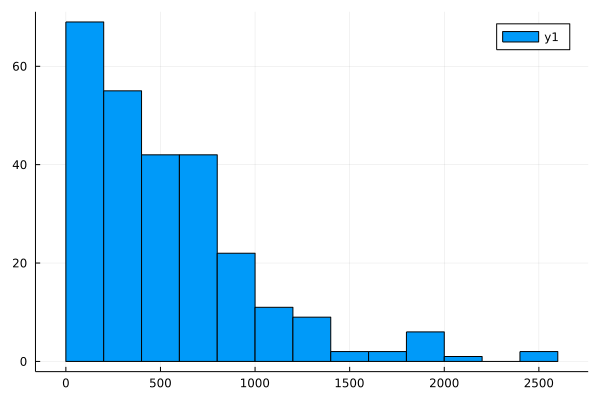

In [19]:
histogram(Hitters.Salary)

## (c) Assumption Checking

In [20]:
# predicted values
pred1 = predict(model1)
# residuals
red1 = Hitters[!, :Salary] - pred1;

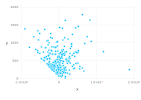

In [21]:
# homoscedasticity Assumption 
Gadfly.plot(x=red1,y=pred1, Geom.point)

### Here the variance is not same in different X value, so homoscedasticity assumption is not OK

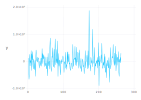

In [22]:
# Independence Assumption
Gadfly.plot(y=red1, Geom.line)

### All the observations look random, So the independent assumption hold

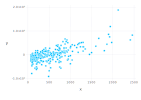

In [23]:
# Exogeneity assumption
Gadfly.plot(x = Hitters[!, :Salary], y=red1)

### We observed some pattern over the plot, so the Epsilon captured some information with was left out previously. It violating the assumption & might missed some idependent varaiable

## After adding more variables (not all) the homoscedasticity assumption behavior may be varying from the previous. The Box-Cox transformation would be a remdey for this. 


## (d) Box-Cox transformation

In [92]:
BoxCoxTrans.transform(Hitters.Salary);
BoxCoxTrans.lambda(Hitters.Salary)

(value = 0.1047769092162786, details = Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [-2.000000, 2.000000]
 * Minimizer: 1.047769e-01
 * Minimum: 1.768043e+03
 * Iterations: 29
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 30)

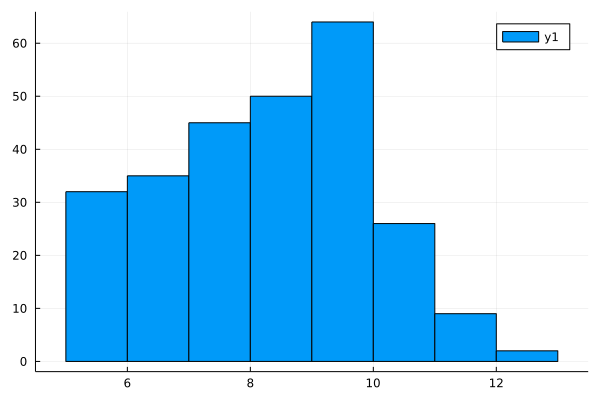

In [93]:
histogram(BoxCoxTrans.transform(Hitters.Salary))

In [94]:
# optimal transformed 
BoxCoxTrans.lambda(Hitters.Salary).value

0.1047769092162786

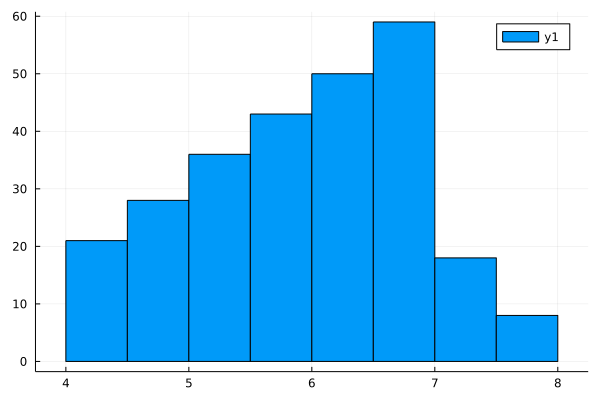

In [95]:
# for lambda=0
histogram(BoxCoxTrans.transform(Hitters.Salary, 0.0))

In [96]:
## BoxCoxTrans

Hitters[!,:bSalary] = BoxCoxTrans.transform(Hitters.Salary)

263-element Vector{Float64}:
  8.660887957127562
  8.680872515017976
  8.75899130425591
  5.775464104517642
  9.553321423902302
  5.351515323156941
  5.918715840198406
  5.459583683716103
 10.335260662147785
  8.823755189534419
  8.806406626414132
  8.942687146819008
  9.415766711784233
  ⋮
  6.69925095062929
 10.686280115555707
  8.852797724275371
  8.942687146819008
 11.131230750370614
  6.21694261074324
  6.75170657867109
  9.415766711784233
  9.864276346810222
  8.264562495270784
 10.05372403301795
 10.137727361794724

In [97]:
names(Hitters)

21-element Vector{String}:
 "AtBat"
 "Hits"
 "HmRun"
 "Runs"
 "RBI"
 "Walks"
 "Years"
 "CAtBat"
 "CHits"
 "CHmRun"
 "CRuns"
 "CRBI"
 "CWalks"
 "League"
 "Division"
 "PutOuts"
 "Assists"
 "Errors"
 "Salary"
 "NewLeague"
 "bSalary"

### Fit the model

In [98]:
m2 = @formula(bSalary~AtBat+Hits+HmRun+Runs+RBI+Walks+Years+CAtBat+CHits+CHmRun+CRuns+CRBI+CWalks+League+Division+PutOuts+Assists+Errors+NewLeague)

FormulaTerm
Response:
  bSalary(unknown)
Predictors:
  AtBat(unknown)
  Hits(unknown)
  HmRun(unknown)
  Runs(unknown)
  RBI(unknown)
  Walks(unknown)
  Years(unknown)
  CAtBat(unknown)
  CHits(unknown)
  CHmRun(unknown)
  CRuns(unknown)
  CRBI(unknown)
  CWalks(unknown)
  League(unknown)
  Division(unknown)
  PutOuts(unknown)
  Assists(unknown)
  Errors(unknown)
  NewLeague(unknown)

In [99]:
model2 = lm(m2, Hitters)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

bSalary ~ 1 + AtBat + Hits + HmRun + Runs + RBI + Walks + Years + CAtBat + CHits + CHmRun + CRuns + CRBI + CWalks + League + Division + PutOuts + Assists + Errors + NewLeague

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                     Coef.   Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)    5.95814      0.325964     18.28    <1e-46   5.31606       6.60021
AtBat         -0.00570516   0.00227646   -2.51    0.0129  -0.0101893    -0.00122104
Hits           0.0249531    0.00853714    2.92    0.0038   0.00813685    0.0417693
HmRun          0.0222238    0.0222679     1.00    0.3193  -0.0216389     0.0660865
Runs          -0.00384939   0.0107032    -0.36

In [100]:
# predicted values
pred2 = predict(model2)
# residuals
red2 = Hitters[!, :Salary] - pred2;

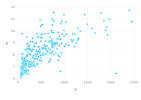

In [101]:
# homoscedasticity Assumption 
Gadfly.plot(x=red2,y=pred2, Geom.point)

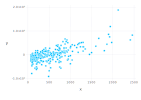

In [102]:
# Exogeneity assumption
Gadfly.plot(x = Hitters[!, :Salary], y=red1)

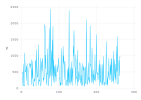

In [103]:
# Independence Assumption
Gadfly.plot(y=red2, Geom.line)

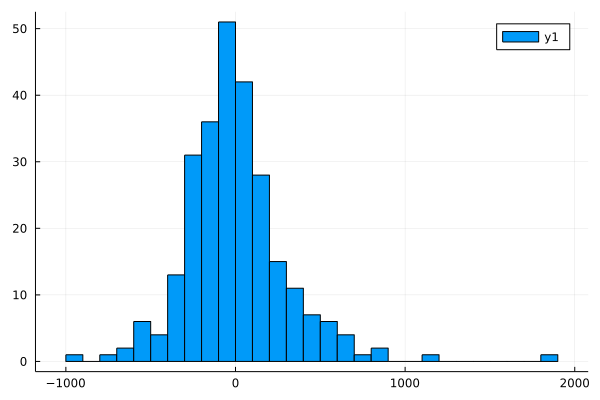

In [104]:
histogram(residuals(model1))

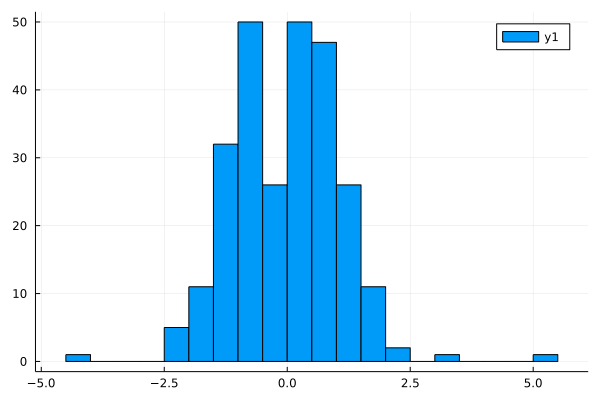

In [105]:
histogram(residuals(model2))

In [106]:
using UnicodePlots
scatterplot(predict(model1),residuals(model1))

         ┌────────────────────────────────────────┐ 
    2000 │⠀⠀⠀⠀⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀│ 
         │⠀⠀⠀⠀⠄⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀│ 
         │⠀⠀⠀⠀⠀⢁⠈⠀⠔⠀⠀⠀⡀⠀⢴⠐⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         │⠀⠀⠠⡀⠠⠈⠈⠈⢐⢤⣀⠤⠄⠁⠅⠀⠐⠀⠂⠒⠀⠀⡀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         │⠡⡡⢠⡳⢚⢖⡃⣂⢠⠰⡈⣤⡄⢾⢌⠥⠂⠀⠂⠀⠀⠐⠈⠀⠀⠀⠀⠀⢄⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀│ 
         │⠉⠉⠙⠛⢽⣯⣽⣭⡛⡽⠙⠉⠉⢛⠉⡋⠉⢻⠉⠉⠋⠉⢉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉⠉│ 
         │⠀⠀⠀⠀⠀⠈⠙⠑⠗⢂⡨⢆⠔⠐⠑⠘⠀⡄⠐⠀⠂⠆⠀⠁⠀⠁⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠂⠀⠀⢌⢀⠀⠐⠀⠀⠀⠠⠀⠀⠀⠄⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⢀⠀⠀⠀⠀⠀⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
   -1000 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
         └────────────────────────────────────────┘ 
         ⠀0⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀2000⠀ 

In [107]:
scatterplot(predict(model2),residuals(model2))

      ┌────────────────────────────────────────┐ 
    6 │⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
      │⠀⠀⠀⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠤⠡⠀⠢⡀⡄⠀⠀⠠⠀⢀⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
      │⠀⠀⢀⠀⠀⠀⠠⡠⡤⠀⠆⢀⠀⡠⠂⡂⡐⢀⡩⠢⠐⠹⠐⠀⢀⠂⠀⠁⡠⠀⠀⠐⠀⠀⠀⠀⠀⠀⠀⠀│ 
      │⠀⠀⠠⠠⡂⠀⠨⠤⡶⡂⠐⢇⠡⢡⢅⡄⡱⠅⢍⠙⢅⡌⡆⠰⠸⠀⠈⠀⠄⠀⠄⠀⠂⠂⠀⠀⠀⠀⡀⠀│ 
      │⠉⠉⣩⠙⠙⡉⣍⢫⡉⢩⡉⠉⠉⢍⠉⡉⡋⢙⠉⠉⠩⠉⢉⠋⠉⡩⢉⠉⠉⠉⠉⢉⠉⠉⠉⢉⠙⠉⠉⠉│ 
      │⠐⠑⠲⠰⠱⠆⠂⡘⡉⠌⠦⠔⠘⠒⠡⠠⠢⠄⡁⠉⠠⠀⠀⠇⠐⠁⠀⠀⠀⠀⠊⠀⡂⠀⠀⢀⠀⠀⠀⠀│ 
      │⠀⠀⠀⠀⠀⠁⠊⠁⠈⠀⠐⢇⠀⠀⠀⠀⠊⠀⠁⠤⠈⠀⠈⠀⠀⠁⠀⠀⠀⠂⠂⠀⠀⠁⠀⠀⠀⡀⠀⠀│ 
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠂⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀│ 
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
      │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
   -5 │⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀│ 
      └────────────────────────────────────────┘ 
      ⠀6⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀12⠀ 

In [108]:
r2(model1)

0.5461158619125323

In [109]:
r2(model2)

0.5613226588015994

### Coefficient Significance

In [110]:
coef(model1)

20-element Vector{Float64}:
  163.10358775117987
   -1.9798728999519999
    7.500767544664079
    4.330882897911241
   -2.376209983954669
   -1.0449619609758753
    6.231286323075035
   -3.489054263241972
   -0.17134047309998213
    0.133990961432787
   -0.17286107024687594
    1.4543049400843155
    0.807708801703598
   -0.811570910626846
   62.59942303518597
 -116.84924563687468
    0.281892513358237
    0.37106921041623425
   -3.360760479856258
  -24.762325108398404

In [111]:
coef(model2)

20-element Vector{Float64}:
  5.958137033293614
 -0.005705155166806257
  0.02495310159281762
  0.02222379248521012
 -0.003849390295303326
 -0.0035743512955071044
  0.020920711214594087
  0.0917027095680033
  0.0001585508668710379
 -0.0007098411167356391
 -0.0002911097216414945
  0.0031233959447287242
  0.0005436135070061818
 -0.002781474659996618
  0.49190304819776487
 -0.3227925416929691
  0.0006722287030038898
  0.001163635150283315
 -0.021367403194437206
 -0.2963798440198402

###  Models Dignostics

In [112]:
regtable(model1, model2)


------------------------------------
                 Salary      bSalary
               ----------   --------
                      (1)        (2)
------------------------------------
(Intercept)       163.104   5.958***
                 (90.779)    (0.326)
AtBat            -1.980**    -0.006*
                  (0.634)    (0.002)
Hits              7.501**    0.025**
                  (2.378)    (0.009)
HmRun               4.331      0.022
                  (6.201)    (0.022)
Runs               -2.376     -0.004
                  (2.981)    (0.011)
RBI                -1.045     -0.004
                  (2.601)    (0.009)
Walks            6.231***    0.021**
                  (1.829)    (0.007)
Years              -3.489     0.092*
                 (12.412)    (0.045)
CAtBat             -0.171      0.000
                  (0.135)    (0.000)
CHits               0.134     -0.001
                  (0.675)    (0.002)
CHmRun             -0.173     -0.000
                  (1.617)    (0.006)


### After performing the Box-Cox transformation, although all of the assumption is not hold properly, the R-square value is improved. It stated that the model is slighty perform well and will be more efficient if further experimental setup is applied.

## (e) Alternating Conditional Expectation (ACE)

In [113]:
using RCall
@rput Hitters
R"str(Hitters)"

'data.frame':	263 obs. of  21 variables:
 $ AtBat    : int  315 479 496 321 594 185 298 323 401 574 ...
 $ Hits     : int  81 130 141 87 169 37 73 81 92 159 ...
 $ HmRun    : int  7 18 20 10 4 1 0 6 17 21 ...
 $ Runs     : int  24 66 65 39 74 23 24 26 49 107 ...
 $ RBI      : int  38 72 78 42 51 8 24 32 66 75 ...
 $ Walks    : int  39 76 37 30 35 21 7 8 65 59 ...
 $ Years    : int  14 3 11 2 11 2 3 2 13 10 ...
 $ CAtBat   : int  3449 1624 5628 396 4408 214 509 341 5206 4631 ...
 $ CHits    : int  835 457 1575 101 1133 42 108 86 1332 1300 ...
 $ CHmRun   : int  69 63 225 12 19 1 0 6 253 90 ...
 $ CRuns    : int  321 224 828 48 501 30 41 32 784 702 ...
 $ CRBI     : int  414 266 838 46 336 9 37 34 890 504 ...
 $ CWalks   : int  375 263 354 33 194 24 12 8 866 488 ...
 $ League   : Factor w/ 2 levels "A","N": 2 1 2 2 1 2 1 2 1 1 ...
 $ Division : Factor w/ 2 levels "E","W": 2 2 1 1 2 1 2 2 1 1 ...
 $ PutOuts  : int  632 880 200 805 282 76 121 143 0 238 ...
 $ Assists  : int  43 82 11 40 42

RObject{NilSxp}
NULL


In [114]:
R"library(acepack)"

RObject{StrSxp}
[1] "acepack"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     


In [115]:
@rput Hitters
R"x <- Hitters[, -c(14,15,19,20)]"
R"y <- Hitters[, 19]"
R"mod <- ace(x,y)"

RObject{VecSxp}
$p
[1] 17

$n
[1] 263

$x
                  1           2           3          4           5          6
AtBat    315.000000  479.000000  496.000000 321.000000  594.000000 185.000000
Hits      81.000000  130.000000  141.000000  87.000000  169.000000  37.000000
HmRun      7.000000   18.000000   20.000000  10.000000    4.000000   1.000000
Runs      24.000000   66.000000   65.000000  39.000000   74.000000  23.000000
RBI       38.000000   72.000000   78.000000  42.000000   51.000000   8.000000
Walks     39.000000   76.000000   37.000000  30.000000   35.000000  21.000000
Years     14.000000    3.000000   11.000000   2.000000   11.000000   2.000000
CAtBat  3449.000000 1624.000000 5628.000000 396.000000 4408.000000 214.000000
CHits    835.000000  457.000000 1575.000000 101.000000 1133.000000  42.000000
CHmRun    69.000000   63.000000  225.000000  12.000000   19.000000   1.000000
CRuns    321.000000  224.000000  828.000000  48.000000  501.000000  30.000000
CRBI     414.000000  2

### R-square value

In [116]:
R"mod$rsq"

RObject{RealSxp}
[1] 0.9798552


### ACE improve the R-square value from the previous experiments.

In [117]:
R"mod"

RObject{VecSxp}
$p
[1] 17

$n
[1] 263

$x
                  1           2           3          4           5          6
AtBat    315.000000  479.000000  496.000000 321.000000  594.000000 185.000000
Hits      81.000000  130.000000  141.000000  87.000000  169.000000  37.000000
HmRun      7.000000   18.000000   20.000000  10.000000    4.000000   1.000000
Runs      24.000000   66.000000   65.000000  39.000000   74.000000  23.000000
RBI       38.000000   72.000000   78.000000  42.000000   51.000000   8.000000
Walks     39.000000   76.000000   37.000000  30.000000   35.000000  21.000000
Years     14.000000    3.000000   11.000000   2.000000   11.000000   2.000000
CAtBat  3449.000000 1624.000000 5628.000000 396.000000 4408.000000 214.000000
CHits    835.000000  457.000000 1575.000000 101.000000 1133.000000  42.000000
CHmRun    69.000000   63.000000  225.000000  12.000000   19.000000   1.000000
CRuns    321.000000  224.000000  828.000000  48.000000  501.000000  30.000000
CRBI     414.000000  2

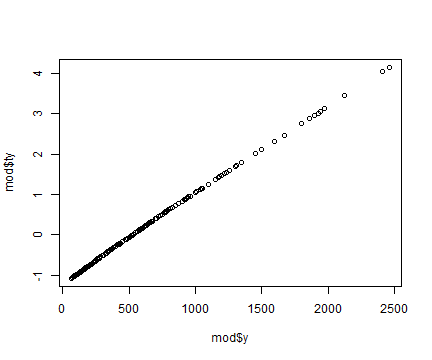

RObject{NilSxp}
NULL


In [118]:
## plots
# view the response transformation
R"plot(mod$y, mod$ty)"

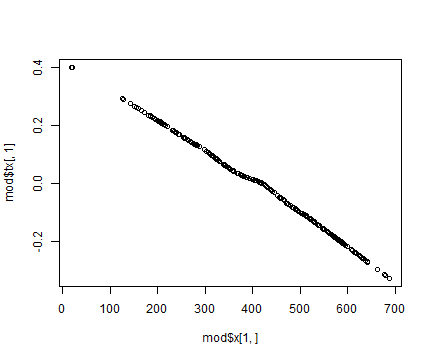

RObject{NilSxp}
NULL


In [70]:
# view x transformation
R"plot(mod$x[1,], mod$tx[,1])"

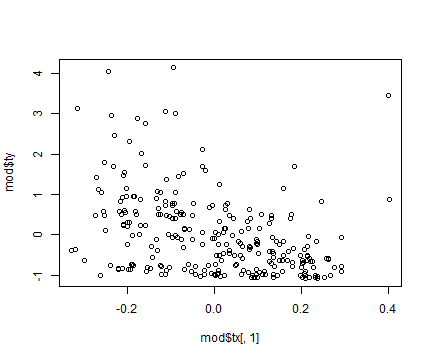

RObject{NilSxp}
NULL


In [119]:
# linearity
R"plot(mod$tx[,1], mod$ty)"